# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

[matrix([[-101.72397081,    1.16978757]]), matrix([[-54.23704349,   0.90096184]]), matrix([[-36.97522016,   0.80324169]]), matrix([[-28.04797742,   0.75270394]]), matrix([[-22.59287195,   0.7218221 ]])]


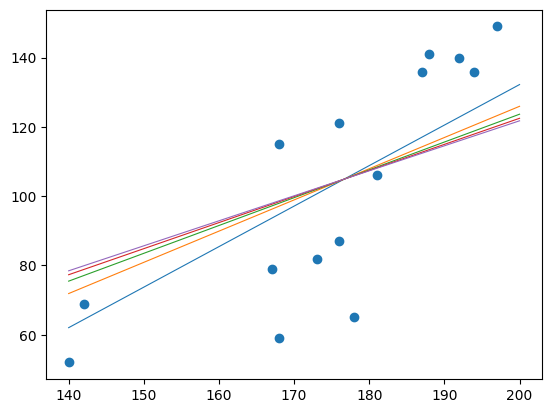

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from Scripts.pywin32_testall import find_and_run

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
temp = x
x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0.1, 0.3, 0.5, 0.7, 0.9] # change here

# add 1-3 line of code here
coefficients = []
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w=w.ravel()
    coefficients.append(w)

print(coefficients)

for w in coefficients:
    value = [w[0,0] + w[0,1]*140, w[0,0] + w[0,1]*200]
    plt.plot([140,200],value, linewidth = '0.8')
plt.scatter(temp, y)
plt.show()


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [6]:
def L1_penalty(weights):
    result = 0
    for w in weights:
        result += np.abs(w)
    return result

def MSE(predictions, real_value):
    result = 0
    for index in range(len(predictions)):
        result += (real_value[index] - predictions[index])**2
    return result/len(predictions)

def compute_predictions(weights, arguments):
    predictions = []
    for x in arguments:
        predictions.append(weights[0] + weights[1]*x)
    return predictions

def compute_gradient(weights, x, y, alpha):
    N = len(y)
    predictions = compute_predictions(weights, x)

    # Gradient MSE
    error = predictions - y
    grad_w0 = (-2/N) * np.sum(error)
    grad_w1 = (-2/N) * np.sum(error * x)

    # Gradient L1 penalty
    grad_w0 += alpha * np.sign(weights[0])
    grad_w1 += alpha * np.sign(weights[1])

    return np.array([grad_w0, grad_w1])

def sgd(x,y,alpha=0.1, epoches=10, learning_rate=0.00001, initial_weights=[]):
    weights = initial_weights
    random_indices = np.random.choice(len(y), size=len(y), replace=False)
    x_samples = x[random_indices]
    y_samples = y[random_indices]
    for epoch in range(epoches):
        # random_indices = np.random.choice(len(y), size=len(y)//3, replace=False)
        # x_samples = x[random_indices]
        # y_samples = y[random_indices]

        gradient = compute_gradient(weights, x_samples, y_samples, alpha)
        weights += learning_rate*gradient

        predictions = compute_predictions(weights, x_samples)
        cost = MSE(predictions, y_samples) + alpha*L1_penalty(weights)

    return weights

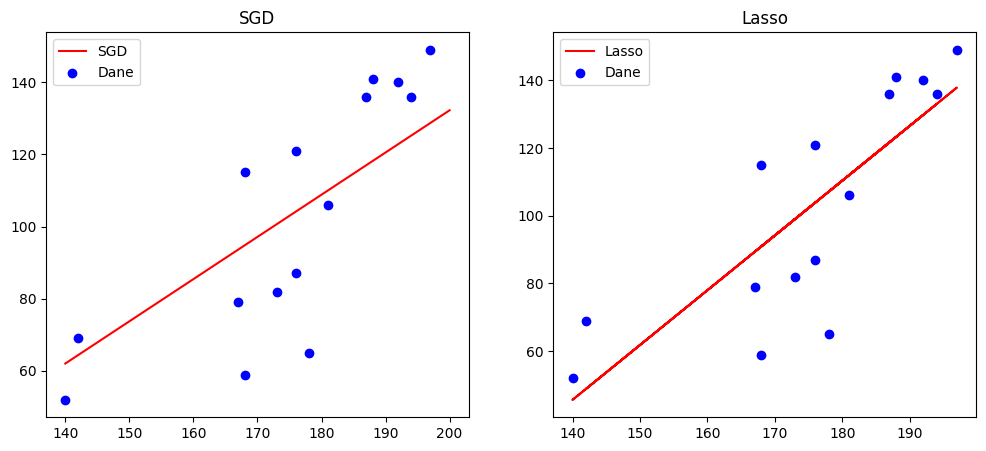

In [7]:
from sklearn.linear_model import Lasso
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
temp = x
alpha = 0.1
x = np.asmatrix(np.c_[np.ones((15,1)),x])
w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
w = sgd(temp, y,alpha = alpha,initial_weights=[w[0,0], w[1,0]])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

value = [w[0] + w[1]*140, w[0] + w[1]*200]
ax1.plot([140, 200], value, color='red', label='SGD')
ax1.scatter(temp, y, color='blue', label='Dane')
ax1.set_title('SGD')
ax1.legend()


lasso = Lasso(alpha=0.1)
lasso.fit(temp, y)
y_pred_lasso = lasso.predict(temp)
ax2.plot(temp, y_pred_lasso, color='red', label='Lasso')
ax2.scatter(temp, y, color='blue', label='Dane')
ax2.set_title('Lasso')
ax2.legend()

plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df['target'] = iris_data.target


x_1 = iris_df['sepal width (cm)'].values
x_2 = iris_df['sepal length (cm)'].values
y = iris_df['target'].values

dataset_size = np.size(x)

mean_x_1, mean_x_2, mean_y = np.mean(x_1), np.mean(x_2), np.mean(y)

cov_x_1 = np.sum(x_1 - mean_x_1)*(x_1-mean_x_1).T
cov_x_2 = np.sum(x_2 - mean_x_2)*(x_2-mean_x_2).T
cov_y = np.sum(y - mean_y)*(y-mean_y).T

cov = cov_x_1 + cov_x_2 + cov_y
# print(cov)
# SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
# SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x
#
# a = SS_xy / SS_xx
# b = mean_y - a * mean_x
#
#
# y_pred = a * x + b